In [ ]:
import numpy as np
import pandas as pd
import copy

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
train = df.sample(frac=0.8, random_state = 42)
valid = df.drop(train.index)
df = train

valid_y = valid["label"].values
valid = valid.values
valid_x = valid[:, 2:]

In [ ]:
df.drop(labels = 'Unnamed: 0', axis=1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2308,4,0,0,0,0,4,0,1,1,0,...,1,0,0,7,15,0,0,0,0,0
22404,4,0,0,0,0,0,0,0,0,0,...,0,0,0,131,124,26,0,0,0,0
23397,0,0,0,0,0,0,0,1,0,0,...,15,4,3,0,0,0,0,0,0,0
25058,4,0,0,0,0,0,0,0,0,0,...,0,0,0,39,83,85,48,0,0,0
2664,6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,97,121,37,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,6,0,0,0,0,0,0,0,2,0,...,100,42,0,0,0,0,0,0,0,0
10938,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24792,3,0,0,0,0,0,0,0,0,0,...,52,3,0,0,0,0,0,0,0,0
24890,2,0,0,0,0,0,0,0,0,0,...,176,187,223,7,0,0,0,0,0,0


In [ ]:
df = df.values

In [ ]:
x = df[:, 2:]
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = df[:, 1]
y

array([4, 4, 0, ..., 3, 2, 7])

# Logistic Final

In [ ]:
import numpy as np
import pandas as pd
import math
import copy

df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
#train = df.sample(frac=0.8, random_state = 4)
#valid = test.drop(train.index)
#df = train
ids = test[["ids"]].values
ids = ids.reshape(ids.shape[0], 1)
test = test.values
#valid_y = valid["label"].values
#valid = valid.values
valid_x = test[:, 1:]

df = df.values

x = df[:, 2:]

y = df[:, 1]

def sigmoid(z):
  return (1/(1 + np.exp(-z)))

def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std, mu, std

def parameters(x, y, alpha, y1, model):
  w = np.zeros(x.shape[1])
  b = 0
  for i in range(1000):  #inter
    if model == 9:
      alpha = 0.005
    z = np.dot(x, w) + b
    p = sigmoid(z)

    dw = (1/x.shape[0]) * np.dot(x.T , (p - y))
    db = (1/x.shape[0]) * np.sum(p - y)

    w = w - alpha * dw
    b = b - alpha * db
#    if i%200==0:
#      print(cost(y1, z))
  return w, b


def accuracy(p, t):
  return np.sum(p==t)/len(t)

def cost(y, z):
  return -1*(1/y.shape[0]) * np.sum(y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z)))

x,m,s = normalize(x)
valid_x,h,j = normalize(valid_x)
#Models

par = np.zeros((10, x.shape[1] + 1))
prob = np.zeros((valid_x.shape[0], 10))   ####

for j in range(10):
  y1 = copy.copy(y)
  #valid_y1 = copy.copy(valid_y)
  
  for i in range(y.shape[0]):
    if y1[i] == j:
      y1[i] = 1
    else:
      y1[i] = 0
  '''
  for i in range(valid_y.shape[0]):
    if valid_y1[i] == j:
      valid_y1[i] = 1
    else:
      valid_y1[i] = 0
  '''
  print("model: ", j)
  w, b = parameters(x, y1, 0.01, y1, j)  #alpha  ####
  par[j][:par.shape[1]-1] = w
  par[j][-1] = b
  z = np.dot(valid_x, w) + b    ####
  p = sigmoid(z)
  prob[:, j] = p

res = np.zeros(valid_x.shape[0])    ####
for i in range(prob.shape[0]):
  res[i] = np.argmax(prob[i])

print(accuracy(res, y))   ####
res = res.reshape(res.shape[0], 1)
#output = np.concatenate((ids, res), 1)



model:  0
model:  1
model:  2
model:  3
model:  4
model:  5
model:  6
model:  7
model:  8
model:  9
0.0


<ipython-input-1-f7c4d36bb77b>:52: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.sum(p==t)/len(t)


In [ ]:
prob.shape

(10000, 10)

In [ ]:
res1 = res.T[0]
ids1 = ids.T[0]

outputDict = {
    'Ids': list(ids1),
    'Result': list(res1)
}

outputDictdf = pd.DataFrame(outputDict)

outputDictdf.to_csv("LogisticRegressionOutputPandas.csv")

# outputDictdf

# res1, ids1

In [ ]:
a = np.array([
    [1],
    [2],
    [3],
    [4]
])

a.reshape(1, 4), a.T[0]

(array([[1, 2, 3, 4]]), array([1, 2, 3, 4]))

In [ ]:
output = np.concatenate((ids, res), 1)

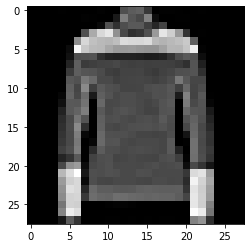

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
import matplotlib.pyplot as plt
plt.imshow(test.to_numpy()[83, 1:].reshape(28, 28), cmap='gray')

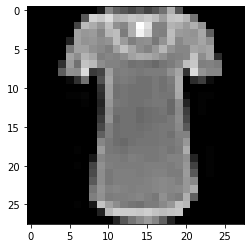

In [ ]:
plt.imshow(df.to_numpy()[5, 2:].reshape(28, 28), cmap='gray')

In [ ]:
#np.savetxt('logisticOutput.csv', output, delimiter= ',')

In [ ]:
ids

array([[25672],
       [59964],
       [66230],
       ...,
       [99226],
       [58519],
       [80458]])

In [ ]:
w, b = parameters(x, y, 0.01)
yhat = predict(valid_x, w, b)

accuracy(yhat, valid_y) * 100

<ipython-input-91-52a2eba2109c>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


90.5

In [ ]:
res = np.zeros(3)
r = np.array([1, 0, 1])

res = res + 5*r
res

array([5., 0., 5.])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cyberlab/linear_train.csv')

In [ ]:
df.head(10)

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,-284.685568,284.567363,18.462706,0.012380,-52.394580,-0.942413,6.746190,19.595626,554.989342,...,33.451992,-9.171214,528.122484,-1959.593876,-47.348529,767.129260,-12.001084,83.978055,737.317448,-218.016231
1,1,-428.480005,307.240676,22.632897,-0.099657,6.294685,30.440746,95.919775,-52.450992,-872.531179,...,14.848331,-33.556867,-569.261772,-2014.463089,20.042132,769.298704,18.057370,-55.521630,775.407458,154.140849
2,2,-25.800879,237.433758,-0.467505,-0.115813,-7.837079,21.598922,158.095089,2.554397,136.298244,...,-12.662449,28.956309,1069.504591,-1932.524770,18.419684,781.523541,70.652625,302.121708,810.402101,394.849701
3,3,-292.645787,249.444200,-3.661449,0.020113,-4.273514,21.421400,71.012817,49.089192,-444.041731,...,-1.741291,-65.225030,-35.017662,-1987.750883,32.222111,774.167118,-38.784611,-171.210149,793.225247,-83.932183
4,4,-264.114362,259.031693,-17.772049,-0.108774,6.512923,13.657296,78.446286,20.942401,-257.340694,...,17.309833,17.309769,-1086.046476,-2040.302324,22.900939,809.692581,-32.675473,104.996827,841.923375,-120.640357
5,5,193.344631,285.745726,-53.483941,-0.017641,18.593014,43.228310,45.982257,-36.031217,-292.831698,...,-8.554298,-21.241737,70.684480,-1982.465776,-20.491796,734.202958,-22.804325,45.142360,739.243447,-122.715251
6,6,-196.157827,230.929450,-37.963296,0.026508,-7.310071,27.125842,50.283765,-40.433601,-560.867299,...,12.137186,35.837688,-254.050647,-1998.702532,19.103373,780.219980,-19.118230,-6.279496,800.778228,-218.918438
7,7,-221.312494,248.416552,-7.247610,-0.033209,65.572977,7.208908,110.475807,51.075872,745.115034,...,13.538281,60.427038,-427.429079,-2007.371454,42.005396,780.706453,8.509696,30.153630,771.927299,251.717568
8,8,-417.965179,207.391605,-18.715778,0.103775,31.015769,25.873403,77.105235,21.191801,-287.193289,...,-24.407016,-0.483272,1030.660228,-1934.466989,-17.500545,754.965747,-11.484060,-234.197068,807.298291,-18.888337
9,9,29.154337,227.364910,-12.645949,0.184828,8.578613,13.176155,26.596283,-46.943673,-327.411015,...,-21.495758,12.276679,-284.589670,-2000.229483,2.498699,796.025435,-8.671056,120.375899,816.372055,-332.076822


In [ ]:
df = df.drop(labels = 'Unnamed: 0', axis = 1)

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'label'],
      dtype='object')

In [ ]:
for column in df.columns:
  print(f'{column}: {df[column].max()},     {df[column].min()},     Range: {df[column].max() - df[column].min()}')

A: 1186.6449795514836,     -1275.1338648800293,     Range: 2461.778844431513
B: 374.7222628448747,     139.25365294519227,     Range: 235.46860989968243
C: 111.58292717145989,     -114.41560740942064,     Range: 225.99853458088052
D: 0.8413366513792128,     -0.8923488434235808,     Range: 1.7336854948027935
E: 127.97383574359306,     -132.697679266157,     Range: 260.67151500975007
F: 84.28418260117743,     -36.17756475412351,     Range: 120.46174735530094
G: 177.47079724213336,     -46.80295514136468,     Range: 224.27375238349805
H: 112.1078143044574,     -137.98388595746164,     Range: 250.09170026191904
I: 958.0619650905512,     -1265.689514782293,     Range: 2223.7514798728444
J: 1689.3366826645793,     1445.7995812139914,     Range: 243.5371014505879
K: 263.6842600107635,     24.94161809344382,     Range: 238.7426419173197
L: 114.16870845932088,     -114.11621444234582,     Range: 228.2849229016667
M: 131.8966835077652,     -127.5886818151108,     Range: 259.485365322876
N: 2279.

In [ ]:
#Add normalisation in future

In [ ]:
# df = df.sort_values('A')

In [ ]:
df

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,label
0,-284.685568,284.567363,18.462706,0.012380,-52.394580,-0.942413,6.746190,19.595626,554.989342,1560.150744,...,33.451992,-9.171214,528.122484,-1959.593876,-47.348529,767.129260,-12.001084,83.978055,737.317448,-218.016231
1,-428.480005,307.240676,22.632897,-0.099657,6.294685,30.440746,95.919775,-52.450992,-872.531179,1544.933514,...,14.848331,-33.556867,-569.261772,-2014.463089,20.042132,769.298704,18.057370,-55.521630,775.407458,154.140849
2,-25.800879,237.433758,-0.467505,-0.115813,-7.837079,21.598922,158.095089,2.554397,136.298244,1550.705661,...,-12.662449,28.956309,1069.504591,-1932.524770,18.419684,781.523541,70.652625,302.121708,810.402101,394.849701
3,-292.645787,249.444200,-3.661449,0.020113,-4.273514,21.421400,71.012817,49.089192,-444.041731,1585.456001,...,-1.741291,-65.225030,-35.017662,-1987.750883,32.222111,774.167118,-38.784611,-171.210149,793.225247,-83.932183
4,-264.114362,259.031693,-17.772049,-0.108774,6.512923,13.657296,78.446286,20.942401,-257.340694,1553.952288,...,17.309833,17.309769,-1086.046476,-2040.302324,22.900939,809.692581,-32.675473,104.996827,841.923375,-120.640357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-85.031310,222.790990,0.095627,0.204109,-52.848040,38.821311,23.198112,-21.586558,-424.165189,1549.541685,...,28.318193,12.697718,-655.264783,-2018.763239,-29.192308,689.387739,-32.005704,-8.231327,819.069926,-516.512029
49996,137.926149,290.653724,50.544278,-0.083692,5.798451,13.489033,71.397422,-26.856339,344.026419,1514.410762,...,-19.500872,8.418415,636.835571,-1954.158221,-11.425503,748.544791,16.364545,-139.060872,742.606658,-116.725300
49997,-254.691431,256.793278,23.197453,-0.134180,-18.699290,18.167020,99.842281,-34.969292,-470.061887,1565.649718,...,4.196743,-49.306852,246.439298,-1973.678035,31.945661,791.303799,-23.078521,188.422643,748.559054,-3.444489
49998,710.054262,257.565009,-16.335601,-0.067519,35.120422,20.832651,56.636551,34.805563,116.608021,1577.231277,...,-24.301008,-11.243710,728.794707,-1949.560265,23.984814,795.210523,15.238836,89.527817,757.012968,445.356781


In [ ]:
X = df['A']
Y = df['label']

X = X.to_numpy()
bias = np.ones(X.shape)
X = np.stack((X, bias), axis = 1)
Y = Y.to_numpy()
X

array([[-284.68556778,    1.        ],
       [-428.48000451,    1.        ],
       [ -25.80087866,    1.        ],
       ...,
       [-254.691431  ,    1.        ],
       [ 710.05426191,    1.        ],
       [-269.82140692,    1.        ]])

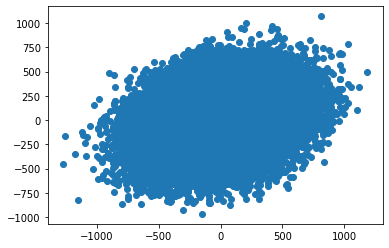

In [ ]:
plt.scatter(X[:, 0], Y)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [ ]:
model.predict([[1, 1], [2, 1], [3, 1]])

array([-0.17481144,  0.07433781,  0.32348705])

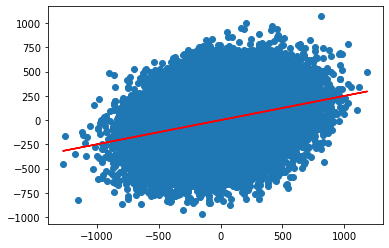

In [ ]:
plt.scatter(X[:, 0], Y,)
plt.plot(X[:, 0], model.predict(X), color = 'red')

- fit(X, Y) -> [w, b], predict(X) -> prediction

In [ ]:
class linearRegression:

  def __init__(self, parameters, learningRate):
    self.parameters = parameters
    self.learningRate = learningRate

  def predict(self, X):
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((X, bias), axis = 1)

    res = []
    for i in range(X.shape[0]):
      res.append(np.dot(X[i, :], self.parameters))

    return np.array(res)


  def costFunction(self, X, Y):
    J = np.sum(np.square(model.predict(X) - Y)) * 0.5 / Y.shape[0]
    return J

  def dJ(self, X, Y):
    dj = []
    for i in range(X.shape[1]):
      dj.append(np.dot(self.predict(X) - Y, X[:, i])/Y.shape[0])
    
    dj.append(np.sum(self.predict(X) - Y)/Y.shape[0])

    return np.array(dj)

  def gradientDescent(self, X, Y):
    self.parameters = self.parameters - self.learningRate * self.dJ(X, Y)

  def fit(self, X, Y, iter = 5):          #X, Y should be numpy values
    for i in range(iter):
      self.gradientDescent(X, Y)

    return self.parameters

In [ ]:
model = linearRegression(np.array([0, 0]), 0.05)
X = np.array([[1], [2], [3], [4], [5]])
Y = 2 * np.array([1, 2, 3, 4, 5])

model.fit(X, Y, 10000)

array([2.00000000e+00, 2.66102264e-15])

In [ ]:
model.costFunction(X, Y)

7.888609052210118e-31

In [ ]:
x = np.array([[1], [2], [3]])
x * 0.5

array([[0.5],
       [1. ],
       [1.5]])

array([[1., 1.],
       [2., 1.],
       [3., 1.]])

In [ ]:
model.parameters

array([0, 0])

In [ ]:
res = []
for i in range(x.shape[0]):
  res.append(np.dot(x[i, :], model.parameters))
res

ValueError: ignored

In [ ]:
model = linearRegression(np.array([0, 0]), 0.05)
X = df['A']
Y = df['label']
X = X.to_numpy()
Y = Y.to_numpy()

X = X.reshape((X.shape[0], 1))
X = X[0:100, :]
Y = Y.reshape((Y.shape

SyntaxError: ignored

- Final

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [ ]:
class linearRegression:

  def __init__(self, parameters, learningRate):
    self.parameters = parameters
    self.learningRate = learningRate
    
    # self.Y_mu = Y_mu
    # self.Y_sigma = Y_sigma

  def predict(self, X, Y): #yaha par woh 4 parameters tha
    # X = (X - X_mu)/X_sigma


    # xmax=X.max
    
    # X = X/xmax

    # ymax=max(Y)

    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((X, bias), axis = 1)

    res = []
    for i in range(X.shape[0]):
      res.append(np.dot(X[i, :], self.parameters))

    res = np.array(res)

    return res
    #return res * Y_sigma + Y_mu * np.ones(res.shape)
    
    # return res * ymax

  def costFunction(self, X, Y):
    J = np.sum(np.square(model.predict(X, Y) - Y)) * 0.5 / Y.shape[0]
    return J

  def dJ(self, X, Y):
    dj = []
    for i in range(X.shape[1]):
      dj.append(np.dot(self.predict(X, Y) - Y, X[:, i])/X.shape[0])
    
    dj.append(np.sum(self.predict(X, Y) - Y)/X.shape[0])

    return np.array(dj)

  def gradientDescent(self, X, Y):
    self.parameters = self.parameters - self.learningRate * self.dJ(X, Y)

  def fit(self, X, Y, iter = 5):          #X, Y should be numpy values
    for i in tqdm(range(iter)):
      self.gradientDescent(X, Y)
      # print(self.costFunction(X, Y))

    
    return self.parameters

In [ ]:
dfRaw = pd.read_csv('/content/drive/MyDrive/cyberlab/linear_train.csv')

#mu = dfRaw.mean().to_numpy()
#sigma = dfRaw.std().to_numpy()

#Y_mu = mu[21]
#Y_sigma = sigma[21]

#x_mu = mu[1:21]
#x_sigma = sigma[1:21]

df = (dfRaw - dfRaw.mean())/dfRaw.std()
# df = dfRaw

Y = df['label'].to_numpy()
df = df.drop(labels = ['Unnamed: 0', 'label'], axis = 1)
X = df.to_numpy()

# X = X[0: 50, :]
# Y = Y[0: 50]

parameters = np.random.rand((X.shape[1] + 1))
model = linearRegression(parameters, 0.5)
parameters = model.fit(X, Y, 100)
#model.predict(np.array(X[0]),Y)

100%|██████████| 100/100 [09:39<00:00,  5.79s/it]


In [ ]:
model.predict(X[0: 5, :], Y[0: 5]), Y[0: 5]

(array([-0.76244462, -0.01388153,  1.95791839,  0.05893877, -0.37528845]),
 array([-0.88330336,  0.62704225,  1.60392427, -0.33914267, -0.48811748]))

In [ ]:
y_mu = Y.mean()
y_sigma = Y.std()

model.predict(X[0: 5], Y[0: 5]) * Y_sigma + Y_mu

array([-188.21969822,   -3.7721852 ,  482.05368784,   14.14438264,
        -92.84932498])

In [ ]:
model.predict(X[0: 5, :], Y[0: 5]), Y[0: 5]

(array([-0.76237845, -0.01382493,  1.95782902,  0.05888687, -0.3753316 ]),
 array([-0.88330336,  0.62704225,  1.60392427, -0.33914267, -0.48811748]))

In [ ]:
X = np.array([[1, 2, 9], [2, 3, 7], [3, 4, 9], [4, 5, 7], [5, 5, 5]])
Y = np.array([22, 25, 32, 35, 35])

model = linearRegression(np.array([1, 2, 3, 5]), 0.005)

# print(f"Parameters: {model.parameters}")
# print(f"Learning Rate: {model.learningRate}")
# print(f"Predict: {model.predict(X)}")
# print(f"dJ: {model.dJ(X, Y)}")
# print(f"gradientDescent: {model.gradientDescent(X, Y)}")

model.fit(X, Y, 70)

196064511560.63974
1.2214363180400266e+17
7.609264253470007e+22
4.740394699581798e+28
2.9531556743578377e+34
1.8397473184587934e+40
1.146119801663458e+46
7.14005986901242e+51
4.448091277987655e+57
2.7710574393329962e+63
1.72630435217972e+69
1.0754474714432374e+75
6.699787684444443e+80
4.173811944194299e+86
2.6001877919126248e+92
1.6198565348915288e+98
1.0091329563933913e+104
6.286663675110329e+109
3.9164452923232794e+115
2.4398543520768173e+121
1.519972529941014e+127
9.469075438083967e+132
5.899013823335653e+138
3.674948448287621e+144
2.2894074335182577e+150
1.4262475978651974e+156
8.885190904138049e+161
5.535267335148858e+167
3.448342843967092e+173
2.1482374110516693e+179
1.338301956348636e+185
8.337310006577799e+190
5.19395027527512e+196
3.2357102519573625e+202
2.0157722503547458e+208
1.2557792413094533e+214
7.823212680034765e+219
4.8736795946107656e+225
3.0361890648254497e+231
1.8914751900308015e+237
1.1783450628782693e+243
7.340815753374919e+248
4.5731575259771165e+254
2.8489708037

<ipython-input-20-866585bde301>:19: RuntimeWarning: overflow encountered in square
  J = np.sum(np.square(model.predict(X) - Y)) * 0.5 / Y.shape[0]


array([1.05143735e+201, 1.27792575e+203, 2.18393825e+201, 3.07361079e+200])

In [ ]:
dfRaw.describe()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,0.234036,250.032231,-0.043196,0.000344,-0.138673,22.942050,63.183671,-0.265300,-149.202551,...,-0.307216,0.036604,-2.009511,-1986.100476,0.024010,764.892736,0.099609,63.015279,789.092996,-0.365651
std,14433.901067,285.713891,28.598415,28.596652,0.215329,28.612768,14.382952,28.504422,28.661015,286.684254,...,28.621340,28.642504,570.633593,28.531680,28.693994,28.686856,28.568842,142.545457,28.474483,246.405245
min,0.000000,-1275.133865,139.253653,-114.415607,-0.892349,-132.697679,-36.177565,-46.802955,-137.983886,-1265.689515,...,-114.116214,-127.588682,-2522.962140,-2112.148107,-122.862152,648.803028,-122.725457,-552.138988,668.221949,-967.232274
25%,12499.750000,-193.259466,230.766727,-19.168799,-0.145591,-19.365933,13.194655,44.033199,-19.735327,-341.661814,...,-19.506051,-19.201002,-386.661131,-2005.333057,-19.449297,745.523084,-19.104441,-33.195948,769.894348,-166.951079
50%,24999.500000,0.059497,250.176527,0.025505,-0.000804,-0.024488,22.840589,63.255555,-0.411770,-150.646574,...,-0.347854,0.080235,0.512543,-1985.974373,0.020038,765.043604,0.129850,63.317078,789.112656,-0.021428
75%,37499.250000,193.460359,269.501548,19.359475,0.145529,19.089040,32.641552,82.365940,19.008288,44.603651,...,18.973515,19.385837,383.129776,-1966.843511,19.464868,784.169033,19.366536,159.625909,808.184537,167.628421
max,49999.000000,1186.644980,374.722263,111.582927,0.841337,127.973836,84.284183,177.470797,112.107814,958.061965,...,114.168708,131.896684,2279.968853,-1872.001557,131.750204,875.580472,118.396997,626.430349,903.761618,1069.795054


In [ ]:
dfRaw.head(0).to_numpy()

array([], shape=(0, 22), dtype=float64)

In [ ]:
df.mean().to_numpy()

array([ 2.34036238e-01,  2.50032231e+02, -4.31957007e-02,  3.44110749e-04,
       -1.38673225e-01,  2.29420503e+01,  6.31836705e+01, -2.65299692e-01,
       -1.49202551e+02,  1.56011787e+03,  1.30032571e+02, -3.07216356e-01,
        3.66035238e-02, -2.00951067e+00, -1.98610048e+03,  2.40095359e-02,
        7.64892736e+02,  9.96091861e-02,  6.30152786e+01,  7.89092996e+02])

In [ ]:
dfRaw.head(1).to_numpy()[0]

array([ 0.00000000e+00, -2.84685568e+02,  2.84567363e+02,  1.84627063e+01,
        1.23804349e-02, -5.23945804e+01, -9.42412935e-01,  6.74619000e+00,
        1.95956259e+01,  5.54989342e+02,  1.56015074e+03,  7.24516543e+01,
        3.34519920e+01, -9.17121371e+00,  5.28122484e+02, -1.95959388e+03,
       -4.73485285e+01,  7.67129260e+02, -1.20010842e+01,  8.39780551e+01,
        7.37317448e+02, -2.18016231e+02])

In [ ]:
type(y)

array([[-218.01623149],
       [ 154.14084898],
       [ 394.84970115],
       ...,
       [  -3.44448897],
       [ 445.35678148],
       [-500.9246807 ]])

In [ ]:
print(y)

[[-218.01623149]
 [ 154.14084898]
 [ 394.84970115]
 ...
 [  -3.44448897]
 [ 445.35678148]
 [-500.9246807 ]]


In [ ]:
train_data[target].values

array([-218.01623149,  154.14084898,  394.84970115, ...,   -3.44448897,
        445.35678148, -500.9246807 ])